In [1]:
import numpy as np
import pandas as pd 
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = load_wine()

In [3]:
X,y = load_wine(return_X_y=True,as_frame=True)

In [4]:
y.value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

In [5]:
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
X.shape

(178, 13)

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
data = X.join(pd.Series(y,name='class'))

In [9]:
data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [10]:
#calculating mean vector
mean_vector = pd.DataFrame()
for c,r in data.groupby('class'):
    mean_vector[c] = r.mean()

mean_vector.drop('class',axis=0,inplace=True)

In [11]:
mean_vector

,0,1,2
alcohol,13.744746,12.278732,13.153750
malic_acid,2.010678,1.932676,3.333750
ash,2.455593,2.244789,2.437083
alcalinity_of_ash,17.037288,20.238028,21.416667
magnesium,106.338983,94.549296,99.312500
total_phenols,2.840169,2.258873,1.678750
flavanoids,2.982373,2.080845,0.781458
nonflavanoid_phenols,0.290000,0.363662,0.447500
proanthocyanins,1.899322,1.630282,1.153542
color_intensity,5.528305,3.086620,7.396250


In [12]:
#within class matrix

wcmat = np.zeros((13,13))

for col,row in data.groupby('class'):
    row = row.drop('class',axis=1)
    sb= np.zeros((13,13))
    
    for index,r in row.iterrows():
        x = r.values.reshape(13,1)
        m = mean_vector[col].values.reshape(13,1)
        
        sb= sb+((x-m).dot((x-m).T))
        wcmat += sb

In [13]:
wcmat.shape

(13, 13)

In [14]:
mean_feat = X.mean()
mean_feat

alcohol                          13.000618
malic_acid                        2.336348
ash                               2.366517
alcalinity_of_ash                19.494944
magnesium                        99.741573
total_phenols                     2.295112
flavanoids                        2.029270
nonflavanoid_phenols              0.361854
proanthocyanins                   1.590899
color_intensity                   5.058090
hue                               0.957449
od280/od315_of_diluted_wines      2.611685
proline                         746.893258
dtype: float64

In [15]:
# between class matrix

bcmat = np.zeros((13,13))

for c in mean_vector:
    n = len(data.loc[data['class']==c].index)
    m = mean_vector[c].values.reshape(13,1)
    mf = mean_feat.values.reshape(13,1)
     
    bcmat+= n*((m-mf).dot((m-mf).T))

In [16]:
bcmat.shape

(13, 13)

In [17]:
eigen_values, eigen_vectors = np.linalg.eig((np.linalg.inv(wcmat)).dot(bcmat))


In [18]:
eigen_values

array([ 0.00000000e+00+0.00000000e+00j,  1.37925620e-01+0.00000000e+00j,
        2.81577906e-01+0.00000000e+00j, -3.84135715e-17+0.00000000e+00j,
        1.82005764e-17+1.15517043e-17j,  1.82005764e-17-1.15517043e-17j,
       -1.83727055e-17+0.00000000e+00j, -5.91119443e-18+1.38469360e-17j,
       -5.91119443e-18-1.38469360e-17j, -5.55056456e-18+0.00000000e+00j,
        5.89907305e-19+4.73778154e-18j,  5.89907305e-19-4.73778154e-18j,
        1.07361526e-18+0.00000000e+00j])

In [19]:
eigen_vectors[1]

array([ 0.09448377+0.j        ,  0.11466545+0.j        ,
       -0.05339794+0.j        ,  0.13837469+0.j        ,
        0.04730967-0.00491825j,  0.04730967+0.00491825j,
       -0.0300462 +0.j        ,  0.01637685-0.00945402j,
        0.01637685+0.00945402j,  0.08997559+0.j        ,
        0.08606823-0.01811193j,  0.08606823+0.01811193j,
       -0.07901711+0.j        ])

In [20]:
pairs = [(np.abs(eigen_values[i]),eigen_vectors[:,i]) for i in range(len(eigen_values))]
pairs = sorted(pairs, key=lambda x: x[0], reverse=True)

for pair in pairs:
    print(pair[0])

0.2815779062784266
0.13792561974216486
3.8413571518892924e-17
2.1556967622074838e-17
2.1556967622074838e-17
1.8372705462845277e-17
1.5055891090666486e-17
1.5055891090666486e-17
5.550564560986754e-18
4.774365356174605e-18
4.774365356174605e-18
1.073615260378249e-18
0.0


In [21]:
pairs[0][1]

array([ 0.04786136+0.j, -0.05339794+0.j,  0.12264712+0.j, -0.04735248+0.j,
        0.00226325+0.j, -0.22027961+0.j,  0.54085947+0.j,  0.68598424+0.j,
       -0.13156731+0.j, -0.09739515+0.j,  0.1933421 +0.j,  0.31900526+0.j,
        0.00070427+0.j])

In [22]:
ld1 = eigen_vectors[1].tolist()
ld2 = eigen_vectors[2].tolist()
ld = np.array([ld1,ld2])

In [23]:
ld

array([[ 0.09448377+0.j        ,  0.11466545+0.j        ,
        -0.05339794+0.j        ,  0.13837469+0.j        ,
         0.04730967-0.00491825j,  0.04730967+0.00491825j,
        -0.0300462 +0.j        ,  0.01637685-0.00945402j,
         0.01637685+0.00945402j,  0.08997559+0.j        ,
         0.08606823-0.01811193j,  0.08606823+0.01811193j,
        -0.07901711+0.j        ],
       [ 0.64094064+0.j        ,  0.68286944+0.j        ,
         0.12264712+0.j        , -0.60183394+0.j        ,
        -0.93787131+0.j        , -0.93787131-0.j        ,
        -0.40701228+0.j        ,  0.7801538 +0.j        ,
         0.7801538 -0.j        ,  0.43932123+0.j        ,
        -0.35674507-0.15538686j, -0.35674507+0.15538686j,
        -0.52566324+0.j        ]])

In [24]:
ld.shape

(2, 13)

In [25]:
X.shape

(178, 13)

In [26]:
X_trf = X.values.dot(ld.T)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(data['class'])

In [28]:
new_data = pd.DataFrame(X_trf, columns=['LD1','LD2'])
new_data['class'] = data['class'].values
new_data.head()

,LD1,LD2,class
0,-73.558454-0.539682j,-678.901475+0.447514j,0
1,-74.505428-0.426586j,-644.606246+0.365159j,0
2,-83.953193-0.420483j,-718.977697+0.332528j,0
3,-106.637131-0.471576j,-884.477500+0.402452j,0
4,-47.376252-0.518832j,-500.578296+0.293681j,0


C:\Users\91700\Desktop\sample_project_1\env\lib\site-packages\matplotlib\collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


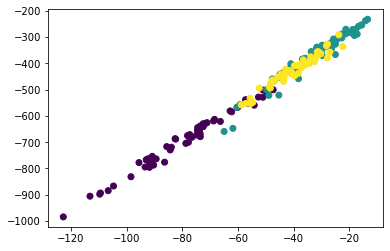

In [29]:
plt.scatter(new_data['LD1'],new_data['LD2'],c=y)

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(solver='eigen')
X_lda = lda.fit_transform(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, random_state=1)

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[18,  0,  0],
       [ 0, 17,  0],
       [ 0,  0, 10]], dtype=int64)

In [40]:
new_data2=pd.DataFrame(X_lda, columns=['LD1','LD2'])
new_data2['class'] = y
new_data2.head()

,LD1,LD2,class
0,-14.049932,16.763206,0
1,-13.648247,15.947578,0
2,-12.759487,16.208475,0
3,-13.551221,18.804212,0
4,-10.832441,15.222251,0


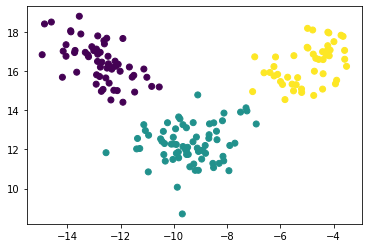

In [41]:
plt.scatter(new_data2['LD1'],new_data2['LD2'],c=y)